<a href="https://colab.research.google.com/github/carolvieirav/Case-Hurb/blob/main/Regress%C3%A3o%20Log%C3%ADstica/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('/content/Default.csv', index_col=0)

In [33]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [34]:
df['default_binary'] = df['default'].apply(lambda x : 1 if x == "Yes" else 0)

In [35]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


# Classificação em Machine Learning

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if pneumonia}  \\
      1 & \text{if doença respiratória}\\
      2 & \text{if covid}
    \end{cases}       
\end{equation}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


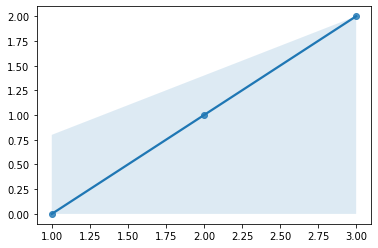

In [36]:
y = [0, 1, 2]

X = [1,2,3]

sns.regplot(X, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


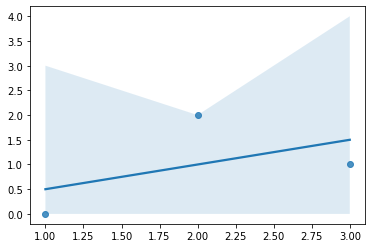

In [37]:
y = [0,2,1]

sns.regplot(X, y)

\begin{equation}
  Y =
    \begin{cases}
      0 & \text{if not pneumonia}  \\
      1 & \text{if pneumonia}
    \end{cases}       
\end{equation}

In [38]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


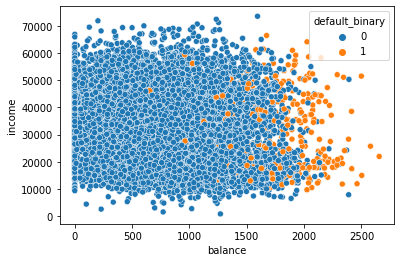

In [39]:
sns.scatterplot('balance', 'income', hue = 'default_binary', data=df, palette = 'tab10')

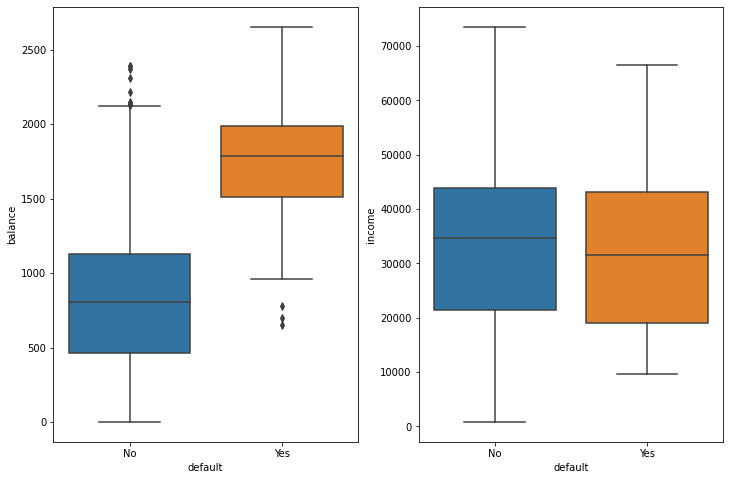

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))


sns.boxplot(x='default', y='balance', data=df, ax=ax[0])

sns.boxplot(x='default', y='income', data=df, ax=ax[1])

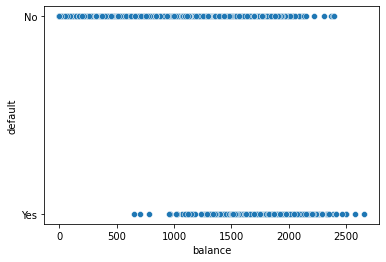

In [41]:
sns.scatterplot(x='balance', y='default', data=df)

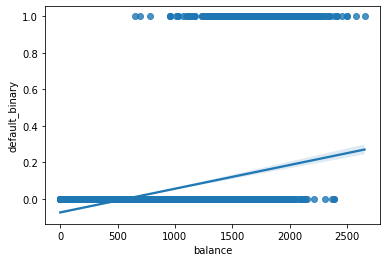

In [42]:
sns.regplot(x='balance', y='default_binary', data=df)

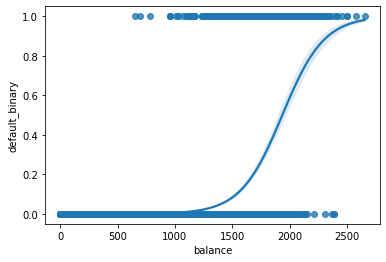

In [43]:
sns.regplot(x='balance', y='default_binary', data=df, logistic=True)

# $$ \frac{e^{x}}{(1+e^{x})} $$

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()

model.fit(X = df[['balance']], y = df['default_binary'])

predictions =  model.predict(df[['balance']])

In [46]:
predictions == df['default_binary']

1        True
2        True
3        True
4        True
5        True
         ... 
9996     True
9997     True
9998     True
9999     True
10000    True
Name: default_binary, Length: 10000, dtype: bool

In [47]:
model.score(X = df[['balance']], y = df['default_binary'])

0.9725

In [48]:
df['default_binary'].value_counts()

0    9667
1     333
Name: default_binary, dtype: int64

In [49]:
df['default_binary'].shape

(10000,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


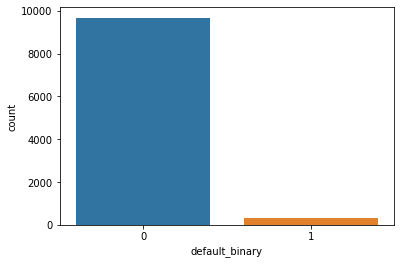

In [50]:
sns.countplot(df.default_binary)

In [51]:
model.coef_

array([[0.00549892]])

# Regressão Logística

In [52]:
df.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


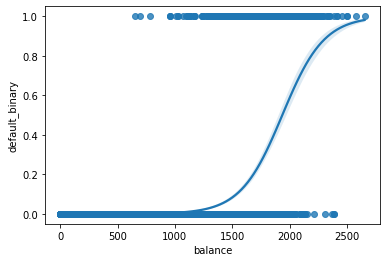

In [53]:
sns.regplot(x='balance', y='default_binary', data=df, logistic=True)

# $$ \frac{e^{x}}{(1+e^{x})} $$

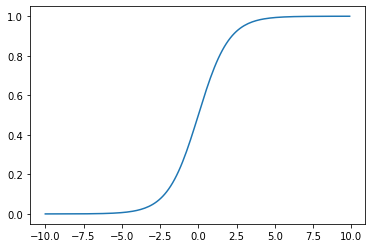

In [54]:
x = np.arange(-10, 10, 0.13)

plt.plot(x, np.exp(x)/(1 + np.exp(x))) # função logit unsando o python

y = a0 + a1 * balanço

# $$ P(default) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$

In [55]:
model.intercept_

array([-10.65132824])

In [56]:
model.coef_

array([[0.00549892]])

# Interpretar os parâmetros da Regressão Logística

# $$ \left(\frac{P(default)}{1 - P(default)}\right) = e^{a_0 + a_1\cdot x}$$

`P = 0.8 `

**80% de probabilidade de ser inadimplente**

*1 - P = 0.2* 

**20% de chance de não ser inadimplente**

P / (1 - P)

Interpretado pela razão 0.8 / 0.2 

**chance de 8:2**

# $$ log\left(\frac{P(default)}{1 - P(default)}\right) = a_0 + a_1x$$

y  = a0 + a1 * X

# Função Custo

# \begin{equation}
  Cost(\hat{p}, y_{obs}) =
    \begin{cases}
      -log(\hat{p}) & \text{if } y_{obs} = 1  \\
      -log(1-\hat{p}) & \text{if } y_{obs} = 0\\
    \end{cases}       
\end{equation}

In [57]:
-np.log(0.99)

0.01005033585350145

In [58]:
-np.log(0.01)

4.605170185988091

In [59]:
-np.log(1 - 0.01)

0.01005033585350145

:$$Cost(\hat{p}, y_{obs}) = -y_{obs} \cdot log(\hat{p}) - (1 - y_{obs})\cdot log(1-\hat{p})$$

In [61]:
X = df[['balance']]
y_obs = df['default_binary']

In [62]:
y_obs = 0

In [73]:
P = 0.95

In [74]:
cost = y_obs * np.log(P) - (1 - y_obs) * np.log(1-P)

In [75]:
cost

2.99573227355399

Text(0.5, 0, 'Probabilidade de y = 1')

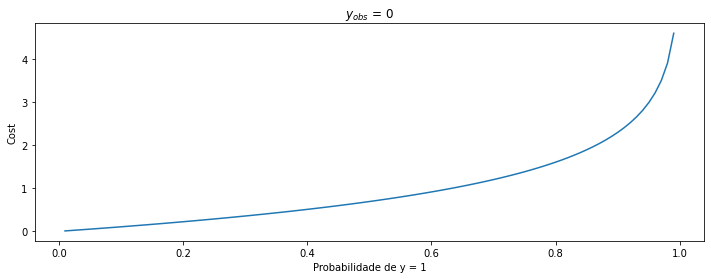

In [76]:
fig, ax = plt.subplots(1, figsize=(12, 4))

y_obs = 0

P = np.arange(0.01, 1, 0.01)

cost = y_obs * np.log(P) - (1 - y_obs) * np.log(1-P)

ax.plot(P, cost)

ax.set_title('$y_{obs}$ = 0')

ax.set_ylabel("Cost")

ax.set_xlabel('Probabilidade de y = 1')

Text(0.5, 0, 'Probabilidade de y = 1')

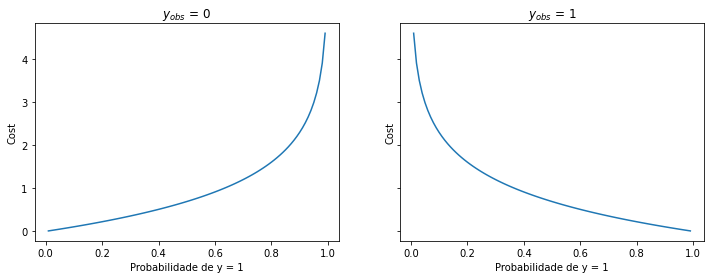

In [79]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,4))

# digo que eu quero dois plots 

# que eles vão fixar os mesmos valores de y

y_obs = 0
p = np.arange(0.01, 1, 0.01)
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[0].plot(p, cost)

# plota o que foi setado para o primeiro plot

y_obs = 1
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[1].plot(p, cost)

#plota o setado para o segundo plot

ax[0].set_title('$y_{obs}$ = 0')
ax[1].set_title('$y_{obs}$ = 1')

# titulo dos plots

ax[0].set_ylabel('Cost')
ax[1].set_ylabel('Cost')

# indicando o custo pra quando o y é 0 e pra quando o y= 1

ax[0].set_xlabel('Probabilidade de y = 1')
ax[1].set_xlabel('Probabilidade de y = 1')

#setando o titulo para x

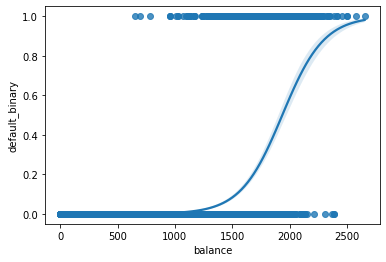

In [80]:
sns.regplot(x='balance',y='default_binary', data=df, logistic=True)

In [81]:
model = LogisticRegression()

model.fit(X=df[['balance']], y=df['default_binary'])
predictions = model.predict(df[['balance']])

In [82]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
model.predict_proba(df[['balance']])[:, 0]

array([0.99869432, 0.9978874 , 0.99140525, ..., 0.99753348, 0.88324037,
       0.99992855])